In [25]:
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
import matplotlib as mpl
# mpl.use('agg')
import os
import numpy as np
import pickle
import xarray as xr
from myTrend import myfitting2d_sttcs,myfitting1d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata 
import warnings
warnings.filterwarnings('ignore')


pthMO='J:/MDLS_OBS_OHC/Area_data/'
wpth='C:/Users/shjo/OneDrive/mySO/zonal_sum/tmp/'

t_rng=[1993, 2020]
varnm='OHC700'
fig_bool=1

myName='Zonally integrated '+varnm+' trend'


### Preparation ============================================================
wpth=wpth+varnm+'_'+str(t_rng[0])+'_'+str(t_rng[-1])+'/'
try :
    os.mkdir(wpth)
except:
    raise

myMDOB=[pthMO+i for i in os.listdir(pthMO) if i.endswith('.nc')]

myDATA=myMDOB
if t_rng[0]<1992:
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]
print(myDATA)

### Read myDATA =============================================================


print('!!! Open files !!!')
myCoefs,myNm,myLat=[],[],[]
lat_rng=[-80,-30]; lon_rng=[0,360]

time_rng=[str(t_rng[0])+'-01',str(t_rng[-1])+'-12']


FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/shjo/OneDrive/mySO/zonal_sum/tmp/OHC700_1993_2020/'

In [62]:

for i in myDATA: 
            
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)
    Area=tmp['Area'].loc[dict(lat=slice(lat_rng[0],lat_rng[-1]),lon=slice(lon_rng[0],lon_rng[-1]))]
    mySST = tmp[varnm].loc[dict(lat=slice(lat_rng[0],lat_rng[-1]),lon=slice(lon_rng[0],lon_rng[-1])\
        ,time=slice(time_rng[0],time_rng[-1]))]
    mySST=mySST.where(mySST<10**30)
    # mySST=mySST.sum(dim='lon',skipna=True)
    time,latR,lonR=mySST.time.values,mySST.lat.values,mySST.lon.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+' trend '+\
        str(time[0])[:4]+' '+str(time[-1])[:4]
    ### SST Coef =============================================================
    print('!!! linregress !!!')
    slope,intercept,r_value,p_value,std_err,smask=myfitting2d_sttcs(mySST,threshold=0.05)
    CoefD=slope*12*10**-8*Area # Decadal^-1
    
    CoefD_P=CoefD.loc[dict(lon=slice(153,290))]
    CoefD_I=CoefD.loc[dict(lon=slice(20,117))]
    CoefD_S=CoefD.loc[dict(lon=slice(180,240),lat=slice(-60,-50))]
    CoefD_A=xr.concat([CoefD.loc[dict(lon=slice(-70+360,360))],CoefD.loc[dict(lon=slice(0,20))]],dim='lon')

    ### Figure configs =======================================================
    CoefD_posi=np.nansum(CoefD.where(CoefD>0))
    CoefD_nega=np.nansum(CoefD.where(CoefD<0))

    CoefD_P_posi=np.nansum(CoefD_P.where(CoefD_P>0))
    CoefD_P_nega=np.nansum(CoefD_P.where(CoefD_P<0))

    CoefD_I_posi=np.nansum(CoefD_I.where(CoefD_I>0))
    CoefD_I_nega=np.nansum(CoefD_I.where(CoefD_I<0))
    
    CoefD_A_posi=np.nansum(CoefD_A.where(CoefD_A>0))
    CoefD_A_nega=np.nansum(CoefD_A.where(CoefD_A<0))

    CoefD_S_posi=np.nansum(CoefD_S.where(CoefD_S>0))
    CoefD_S_nega=np.nansum(CoefD_S.where(CoefD_S<0))
    
    print('!!! ========== !!!')
    print(i.split('/')[-1])
    print('SCP: ',np.nansum(CoefD_S_nega)/CoefD_nega*100,'%')
    print('Pacific: ',np.nansum(CoefD_P_nega)/CoefD_nega*100,'%')
    print('Atlantic: ',np.nansum(CoefD_A_nega)/CoefD_nega*100,'%')
    print('Indian: ',np.nansum(CoefD_I_nega)/CoefD_nega*100,'%')
    print('!!! ========== !!!')


!!! Open: J:/MDLS_OBS_OHC/Area_data/myECCO_199201_201712_tsh.nc !!!
!!! linregress !!!
!!! ========== !!!
myECCO_199201_201712_tsh.nc
SCP:  23.78479558223274 %
Pacific:  56.50575723842499 %
Atlantic:  23.283601507502816 %
Indian:  14.436317097977009 %
!!! ========== !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myEN4_198001_202012_tsh.nc !!!
!!! linregress !!!
!!! ========== !!!
myEN4_198001_202012_tsh.nc
SCP:  10.757247024511955 %
Pacific:  37.765919566008535 %
Atlantic:  14.491761351073418 %
Indian:  43.15432496103122 %
!!! ========== !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myGECCO_198001_201812_ztshuv.nc !!!
!!! linregress !!!
!!! ========== !!!
myGECCO_198001_201812_ztshuv.nc
SCP:  14.67778992137825 %
Pacific:  58.805681597015294 %
Atlantic:  10.77464150139771 %
Indian:  16.856677144965367 %
!!! ========== !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myIAP_198001_201812_tshuv.nc !!!
!!! linregress !!!
!!! ========== !!!
myIAP_198001_201812_tshuv.nc
SCP:  13.174852720756983 %
Pacific:  67.8005

In [58]:
print(CoefD_posi)
print(CoefD_nega)
print(np.nansum(CoefD_S))
print('SCP: ',np.nansum(CoefD_S_nega)/CoefD_nega*100)
print('Pacific: ',np.nansum(CoefD_P_nega)/CoefD_nega*100)

12799212.87731718
-3050488.4693947285
-648505.3673482214
SCP:  23.78479558223274
Pacific:  56.50575723842499


!!!   figure   !!!


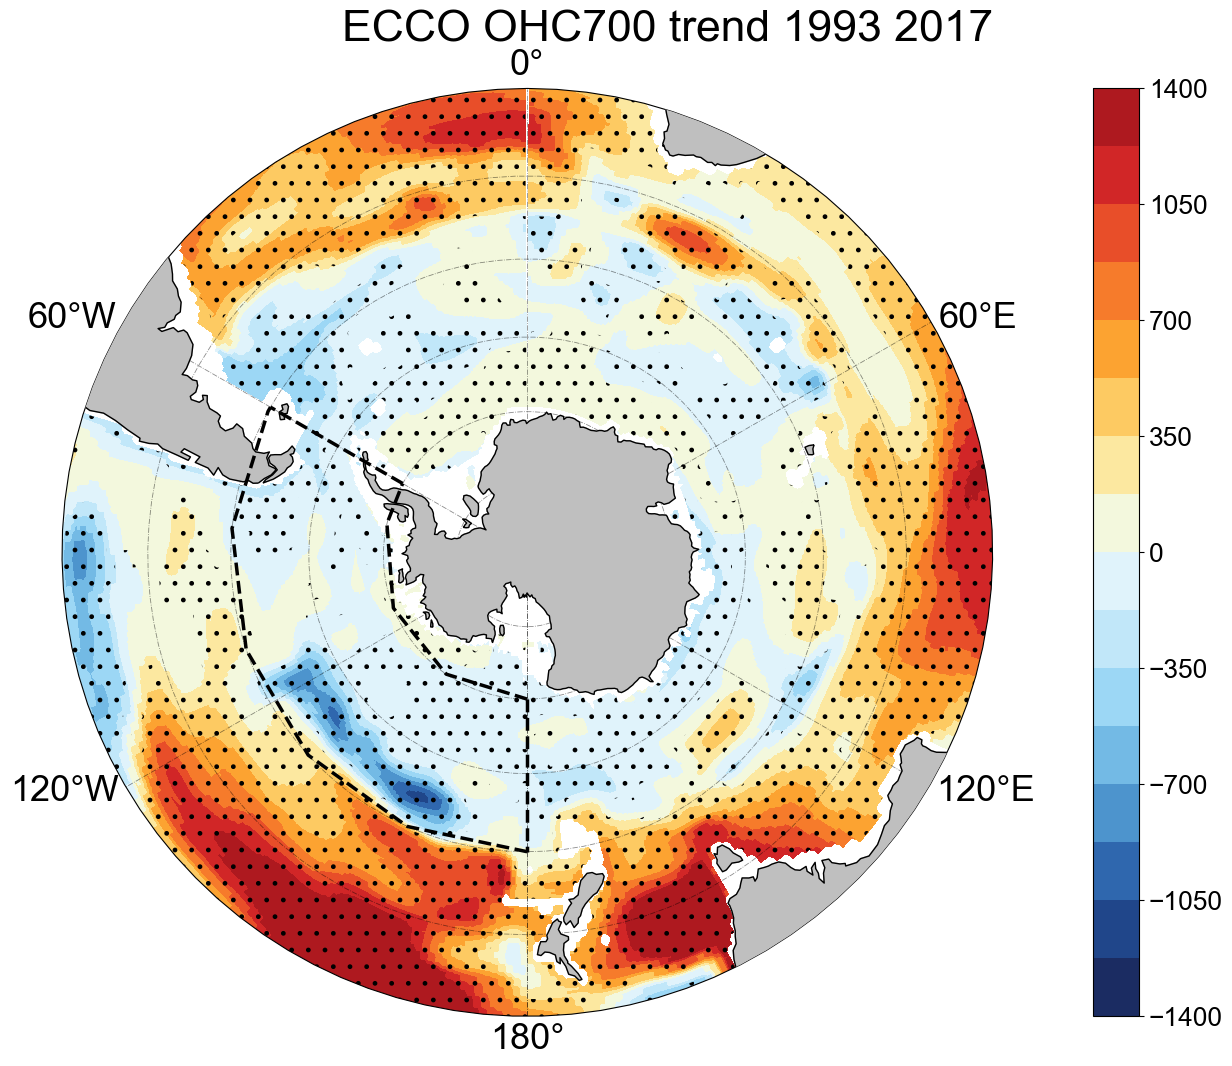

In [30]:
### Figure configs =======================================================
myN=16
sstTlim=[-1400.,1400]
CMAP,mylevel=myClrbr('myblc2',sstTlim,myN)

CoefD[CoefD<sstTlim[0]]=sstTlim[0]
CoefD[CoefD>sstTlim[-1]]=sstTlim[-1]

mySetting={'title_loc':'right',
        'wpth':wpth}

mySetting={
    'figsize': '',
    'mylabel': '',
    'Label_size':18,
    'title_loc':'right',
    'fontParams':'Arial',
    'wpth':wpth}

lonR_m,latR_m=np.meshgrid(lonR,latR)

print('!!!   figure   !!!')
lat_rng_,lon_rng_=[-70,-50],[180,300]
F=figmaster(mySetting)
F.myCrtpy_sph2_box(latR_m,lonR_m,CoefD,smask,CMAP,mylevel,dta_nm,lat_rng_,lon_rng_)


In [64]:
import pandas as pd
A=pd.DataFrame({})

In [65]:
A['ddd']=[1,2,3,4]

In [66]:
A

,ddd
0,1
1,2
2,3
3,4
